# Introducción a las reglas de asociación

Veamos un pequeño notebook para introducir al cómo se realiza el descubrimiento de reglas de asociación mediante python

Utilizaremos la librería mlxtend, ya que scikit-learn no tiene los algoritmos para hacer el análisis. Deberemos instalarlos.


In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Primero, vamos a asumir que ya tenemos los datos limpios.


In [3]:
data = {'ID':[1,2,3,4,5,6],
       'Onion':[1,0,0,1,1,1],
       'Potato':[1,1,0,1,1,1],
       'Burger':[1,1,0,0,1,1],
       'Milk':[0,1,1,1,0,1],
       'Beer':[0,0,1,0,1,0]}

df = pd.DataFrame(data)
df

,ID,Onion,Potato,Burger,Milk,Beer
0,1,1,1,1,0,0
1,2,0,1,1,1,0
2,3,0,0,0,1,1
3,4,1,1,0,1,0
4,5,1,1,1,0,1
5,6,1,1,1,1,0


Vamos a generar primero entonces el conjunto de items frecuentes, usando el soporte mínimo. 

Este valor debe estar en el intervalo, como hemos visto [0,1]. Usando min_supp = 50% significa que solamente queremos los conjuntos de items que aparezcan juntos más de la mitad de las veces.

`apriori(df, min_support=0.5, use_colnames=False, max_len=None)`

In [8]:
item_set = ['Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]

In [9]:
frequent_itemsets = apriori(df[item_set], min_support=0.50, use_colnames=True)

c:\Users\gdrot\OneDrive\Documents\UTN\Explotación de Datos\2025\notebooks\.venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [10]:
frequent_itemsets

,support,itemsets
0,0.666667,(Onion)
1,0.833333,(Potato)
2,0.666667,(Burger)
3,0.666667,(Milk)
4,0.666667,"(Potato, Onion)"
5,0.500000,"(Burger, Onion)"
6,0.666667,"(Potato, Burger)"
7,0.500000,"(Potato, Milk)"
8,0.500000,"(Potato, Burger, Onion)"


Ahora, generaremos las reglas fuertees, considerando la confianza, y otras dos medidas: el lift y la convicción (entre otras).

Recordemos que la confianza o confidence de la regla X→Y es la probabilidad condicional de que ocurra Y si ocurre X en el itemset. 

Por otro lado, el Lift de la regla X→Y es la probabilidad de que Y ocurra si está X, pero considerando también la popularidad de Y.
- Si lift(X→Y) = 1, el antecedente y el consecuente son eventos independientes.
- Si lift(X→Y) > 1, nos dice el grado en el que ambas ocurrencias son dependientes una de la otra. Esto nos ayuda a la toma de decisiones.

In [15]:
# usaremos el conjunto de items frecuentes que hallamos, y especificaremos la métrica que usaremos para generar la regla, en este caso, lift
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules[['antecedents', 'consequents', 'antecedent support', 'antecedent support', 'support', 'confidence', 'lift']]

,antecedents,consequents,antecedent support,antecedent support,support,confidence,lift
0,(Potato),(Onion),0.833333,0.833333,0.666667,0.80,1.200
1,(Onion),(Potato),0.666667,0.666667,0.666667,1.00,1.200
2,(Burger),(Onion),0.666667,0.666667,0.500000,0.75,1.125
3,(Onion),(Burger),0.666667,0.666667,0.500000,0.75,1.125
4,(Potato),(Burger),0.833333,0.833333,0.666667,0.80,1.200
5,(Burger),(Potato),0.666667,0.666667,0.666667,1.00,1.200
6,"(Potato, Burger)",(Onion),0.666667,0.666667,0.500000,0.75,1.125
7,"(Potato, Onion)",(Burger),0.666667,0.666667,0.500000,0.75,1.125
8,"(Burger, Onion)",(Potato),0.500000,0.500000,0.500000,1.00,1.200
9,(Potato),"(Burger, Onion)",0.833333,0.833333,0.500000,0.60,1.200


Podemos ver en estas reglas, utilizando el lift, que las mismas ocurren más frecuentemente juntas de lo que se podría esperar dados el números de transacciones y de productos. 

Explicar por qué ocurre, es parte de estudios posteriores en el dominio del problema.

Quedémonos solo con aquellas que no solo tienen un lift alto, sino también aquellas con la confianza alta.

In [18]:
high_rules = rules [ (rules['lift'] >1.125)  & (rules['confidence']> 0.8)  ]
high_rules[['antecedents', 'consequents', 'antecedent support', 'antecedent support', 'support', 'confidence', 'lift']]

,antecedents,consequents,antecedent support,antecedent support,support,confidence,lift
1,(Onion),(Potato),0.666667,0.666667,0.666667,1.0,1.2
5,(Burger),(Potato),0.666667,0.666667,0.666667,1.0,1.2
8,"(Burger, Onion)",(Potato),0.500000,0.500000,0.500000,1.0,1.2



* **Si se compra Cebollas o Hamburguesas, es muy probable que también se compre papas**
* **Si se compra Cebollas y hamburguesa, es muy probable que se compren papas**

Veamos otro ejemplo

In [22]:
retail_shopping_basket = {'ID':[1,2,3,4,5,6],
                         'Basket':[['Beer', 'Diaper', 'Pretzels', 'Chips', 'Aspirin'],
                                   ['Diaper', 'Beer', 'Chips', 'Lotion', 'Juice', 'BabyFood', 'Milk'],
                                   ['Soda', 'Chips', 'Milk'],
                                   ['Soup', 'Beer', 'Diaper', 'Milk', 'IceCream'],
                                   ['Soda', 'Coffee', 'Milk', 'Bread'],
                                   ['Beer', 'Chips']
                                  ]
                         }

retail = pd.DataFrame(retail_shopping_basket)[['ID', 'Basket']]
retail


,ID,Basket
0,1,"[Beer, Diaper, Pretzels, Chips, Aspirin]"
1,2,"[Diaper, Beer, Chips, Lotion, Juice, BabyFood,..."
2,3,"[Soda, Chips, Milk]"
3,4,"[Soup, Beer, Diaper, Milk, IceCream]"
4,5,"[Soda, Coffee, Milk, Bread]"
5,6,"[Beer, Chips]"


Esta representación es más común en las bases de datos transaccionales. 

Se tiene una lista de transacciones, y cada transacción tiene asociada una lista de artículos comprados, generalmente también con su cantidad.

Deberemos llevar esto a un formato más apropiado, usando one-hot-encoding

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer = MultiLabelBinarizer()
retail_transformed = pd.DataFrame(binarizer.fit_transform(retail.Basket), columns=binarizer.classes_)

Ahora repetiremos el proceso visto anteriormente.

In [28]:
frequent_itemsets_2 = apriori(retail_transformed, use_colnames=True)
frequent_itemsets_2

c:\Users\gdrot\OneDrive\Documents\UTN\Explotación de Datos\2025\notebooks\.venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.666667,(Beer)
1,0.666667,(Chips)
2,0.500000,(Diaper)
3,0.666667,(Milk)
4,0.500000,"(Beer, Chips)"
5,0.500000,"(Beer, Diaper)"


Calculando el soporte, podemos que Cervezas y pañales, así como cervezas y papas fritas, son subconjuntos de items frecuentes.

Veamos si hay causalidad.

In [30]:
rules_2 = association_rules(frequent_itemsets_2, metric='lift')
rules_2[['antecedents', 'consequents', 'antecedent support', 'antecedent support', 'support', 'confidence', 'lift']]

,antecedents,consequents,antecedent support,antecedent support,support,confidence,lift
0,(Beer),(Chips),0.666667,0.666667,0.5,0.75,1.125
1,(Chips),(Beer),0.666667,0.666667,0.5,0.75,1.125
2,(Beer),(Diaper),0.666667,0.666667,0.5,0.75,1.500
3,(Diaper),(Beer),0.500000,0.500000,0.5,1.00,1.500


¿Que podemos concluir de esto?

# Por último, actividades!

Utilizaremos el conjunto de datos de películas, cada una de estas películas que se ve a continuación

In [19]:
movies = pd.read_csv('https://raw.githubusercontent.com/jsrpy/Association_Rule/refs/heads/master/ml-latest-small/movies.csv')
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Queremos saber, qué generos de películas son más frecuentes y si hay una relación causal entre estos géneros. 

Para eso primero hay que hacer cierto preprocesamiento.

In [20]:
movies_ohe = movies.join(movies.genres.str.get_dummies())
movies_ohe.pop('movieId')
movies_ohe.pop('title')
movies_ohe.pop('genres')
movies_ohe.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
movies_ohe.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Veamos algunas estadísticas

In [22]:
stats1 = movies_ohe.sum()
stats1.sort_values()

(no genres listed)      18
Film-Noir              133
IMAX                   153
Western                168
War                    367
Musical                394
Animation              447
Documentary            495
Mystery                543
Children               583
Fantasy                654
Sci-Fi                 792
Horror                 877
Crime                 1100
Adventure             1117
Romance               1545
Action                1545
Thriller              1729
Comedy                3315
Drama                 4365
dtype: int64

<Axes: >

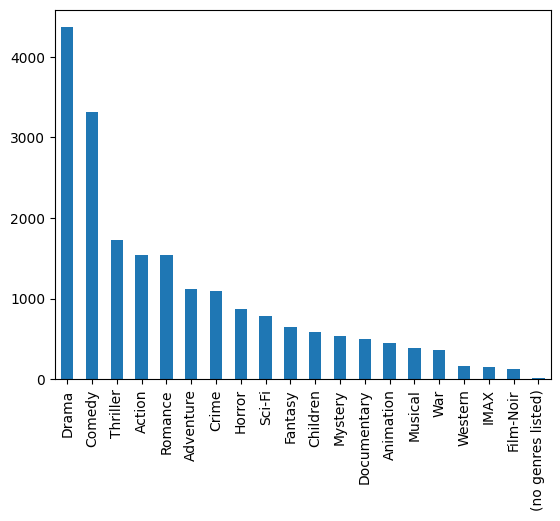

In [23]:
stats1.sort_values(ascending=False).plot(kind='bar')

Vemos que hay algunas sin género, esas no nos interesa, así que eliminaremos esa columna:

In [24]:
movies_ohe.pop('(no genres listed)')
movies_ohe.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Ahora, veremos cuantos géneros tiene cada película. Para eso, primero contaremos cuantos 1 hay por fila, y luego contaremos cuantos de cada número hay.

In [28]:
movies_genre_count = movies_ohe.sum(axis=1, numeric_only=True)

In [33]:
genre_count = movies_genre_count.value_counts()
genre_count

2     3039
1     2775
3     2115
4      852
5      261
6       50
0       18
7       11
8        3
10       1
Name: count, dtype: int64

<Axes: >

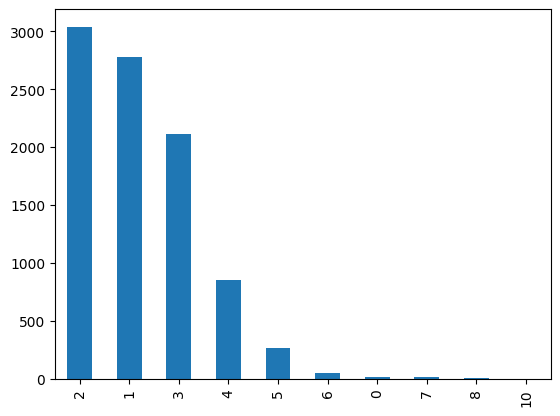

In [34]:
genre_count.plot(kind='bar')

Okay, ahora si:

# Actividades

1. Hallar cuáles géneros ocurren generalmente juntos, y sacar conclusiones.